In [1]:
# https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015

In [35]:
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [3]:
print("Directory Path:", Path().absolute())

Directory Path: /Users/changlonghuang/Python/Scripts


In [4]:
raw_data = pd.read_csv("/Users/changlonghuang/Python/Data/accidental_drug_related_deaths_2012-2018.csv")

In [5]:
# cleaning up the data
raw_data["clean_date"] = pd.to_datetime(raw_data["Date"],infer_datetime_format = True)
raw_data["year"] = raw_data["clean_date"].dt.year.fillna(0.0).astype(int)
raw_data["month"] = raw_data["clean_date"].dt.month.fillna(0.0).astype(int)
raw_data.replace(to_replace = ["ACCIDENT","accident"], value = "Accident", inplace = True)
raw_data.replace(to_replace = ["Y","y"], value = 1, inplace = True)
raw_data["year_month"] = raw_data["year"].astype(str) + "-" + raw_data["month"].astype(str)
raw_data.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,clean_date,year,month,year_month
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",2014-06-28,2014,6,2014-6
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",2013-03-21,2013,3,2013-3
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN,2016-03-13,2016,3,2016-3
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN,2016-03-31,2016,3,2016-3
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)",2013-02-13,2013,2,2013-2


In [23]:
raw_data.dtypes

ID                             object
Date                           object
DateType                       object
Age                           float64
Sex                            object
Race                           object
ResidenceCity                  object
ResidenceCounty                object
ResidenceState                 object
DeathCity                      object
DeathCounty                    object
Location                       object
LocationifOther                object
DescriptionofInjury            object
InjuryPlace                    object
InjuryCity                     object
InjuryCounty                   object
InjuryState                    object
COD                            object
OtherSignifican                object
Heroin                         object
Cocaine                        object
Fentanyl                       object
FentanylAnalogue               object
Oxycodone                      object
Oxymorphone                    object
Ethanol     

In [6]:
raw_data.describe()

,Age,Heroin,Cocaine,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS,year,month
count,5102.000000,2529.0,1521.0,389.0,607.0,108.0,1247.0,118.0,1343.0,474.0,159.0,130.0,25.0,88.0,5105.000000,5105.000000
mean,41.964916,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2014.885211,6.649755
std,12.336639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.936094,3.453275
min,14.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,32.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2014.000000,4.000000
50%,42.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2016.000000,7.000000
75%,52.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2017.000000,10.000000
max,87.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2018.000000,12.000000


In [25]:
# grouping data together for a time series chart
date_count_series = raw_data.groupby("year_month").size()
date_count_df = date_count_series.to_frame().reset_index()
date_count_df = date_count_df[date_count_df.year_month != "0-0"]
year_month = date_count_df["year_month"]
count_of_cases = date_count_df[0]

In [33]:
index_case_count = count_of_cases.reset_index()

In [8]:
list_of_drugs = ['Heroin','Cocaine','FentanylAnalogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Hydromorphone']
col_series = raw_data[list_of_drugs].sum(axis = 0, skipna = True)
col_series.sort_values(ascending = False,inplace = True)

In [9]:
# creating a correlation dataframe
drug_corr_df = raw_data[list_of_drugs].fillna(0).corr()

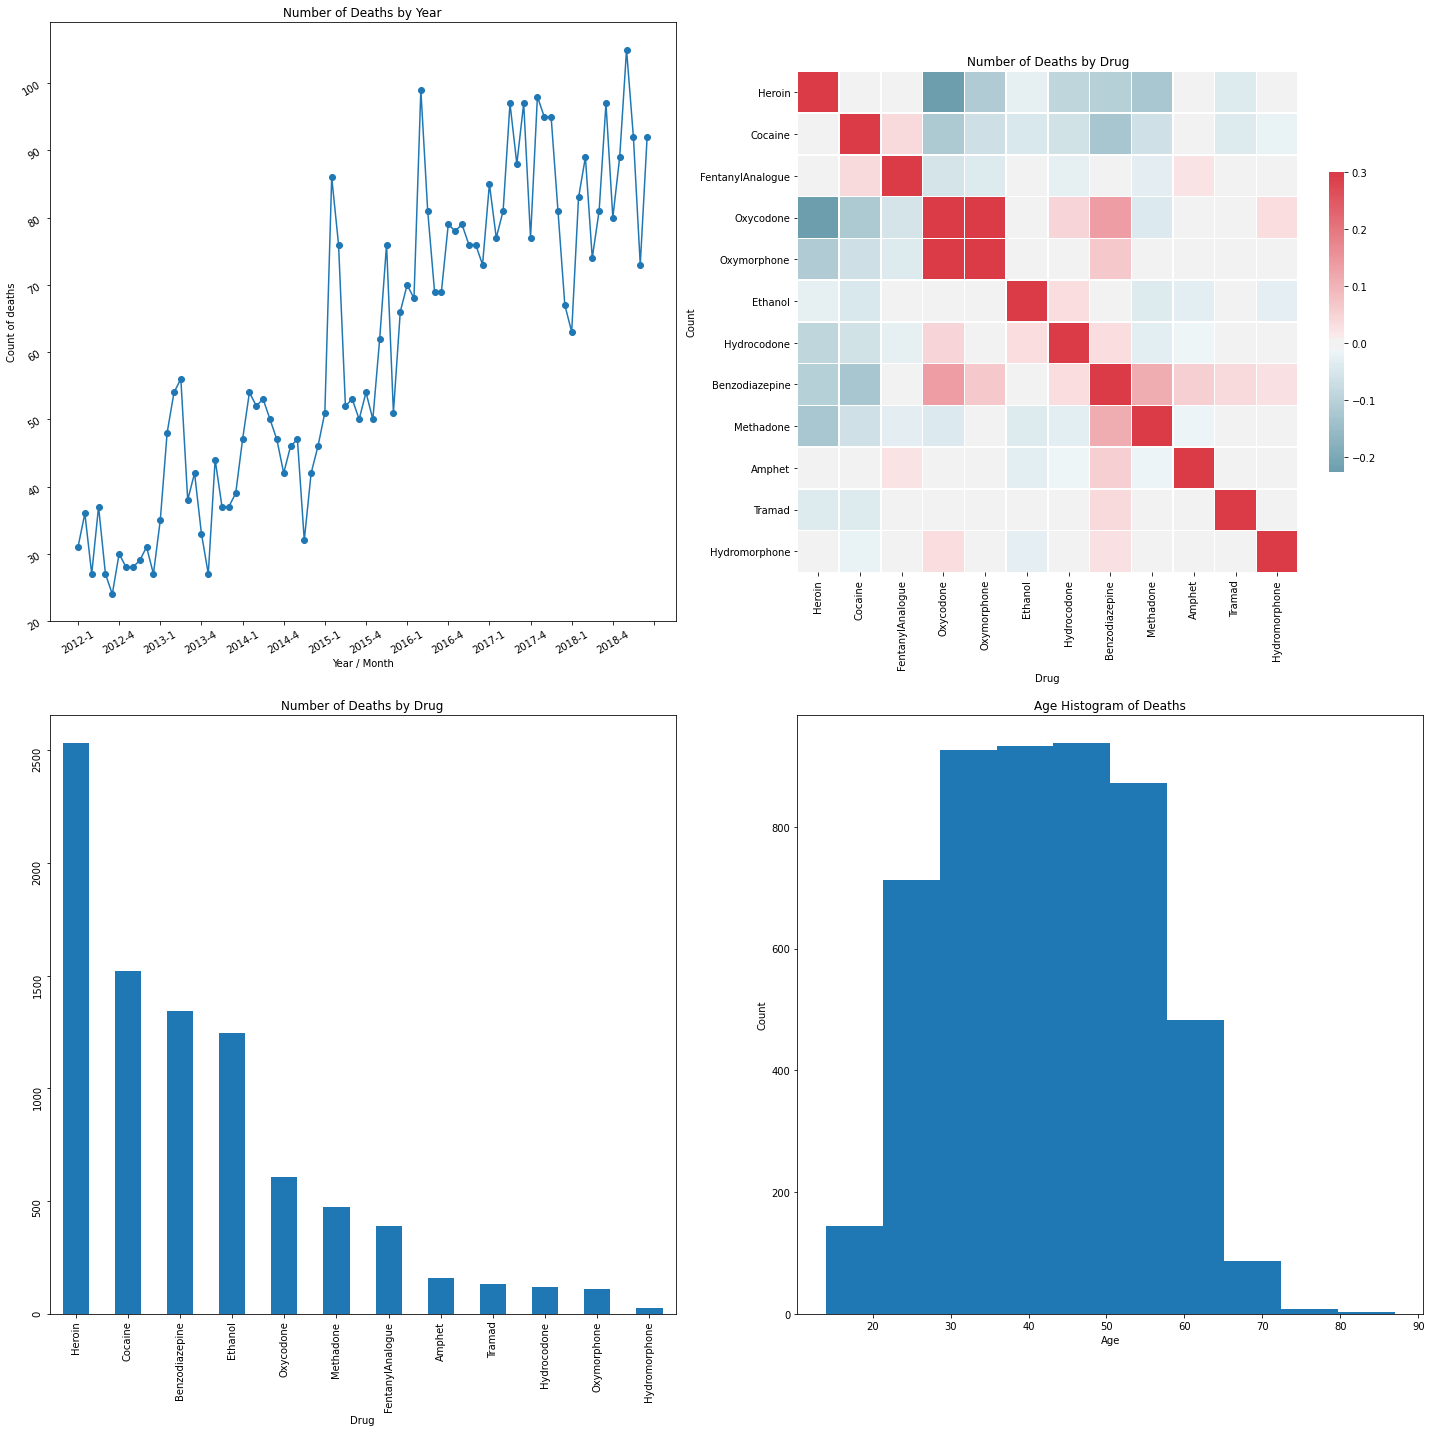

In [74]:
# plots the charts that I'm interested in analyzing
# creates 4 subplots on the x/y axes
myLocator = mticker.MultipleLocator(6)

fig, ax = plt.subplots(2,2,figsize=(20,20))

# time series line chart
ax[0,0].plot(year_month,count_of_cases, marker='o')
ax[0,0].set_title("Number of Deaths by Year")
ax[0,0].set_xlabel("Year / Month")
ax[0,0].set_ylabel("Count of deaths")
ax[0,0].xaxis.set_major_locator(myLocator)
ax[0,0].tick_params(labelrotation=30)

# Sorted number of deaths by drugs bar chart
col_series.plot(ax = ax[1,0], kind = 'bar')
ax[1,0].set_title("Number of Deaths by Drug")
ax[1,0].set_xlabel("Drug")
ax[1,0].tick_params(labelrotation=90)

# correlation heat map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(drug_corr_df, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax[0,1])
ax[0,1].set_title("Number of Deaths by Drug")
ax[0,1].set_xlabel("Drug")
ax[0,1].set_ylabel("Count")

# histogram
ax[1,1].hist(raw_data['Age'], bins=10)
ax[1,1].set_title("Age Histogram of Deaths")
ax[1,1].set_xlabel("Age")
ax[1,1].set_ylabel("Count")

plt.tight_layout()

In [70]:
race_sex_series = raw_data.groupby(["Sex","Race"]).size()
race_sex_df = race_sex_series.to_frame().reset_index()
race_sex_df = race_sex_df.rename(columns={0:"Values"})

pivot_race_sex_df = race_sex_df.pivot(index = "Race", columns = "Sex", values = "Values")
pivot_race_sex_df = pivot_race_sex_df.reset_index().sort_values(["Male","Race"], ascending=[0,1]).set_index("Race")

<AxesSubplot:xlabel='Race'>

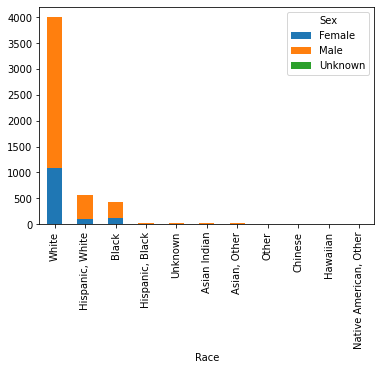

In [71]:
pivot_race_sex_df.plot.bar(stacked = True)

In [42]:
index_col = index_case_count.iloc[:,0].values.reshape(-1, 1)
count_col = index_case_count.iloc[:,1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(index_col, count_col)  # perform linear regression
Y_pred = linear_regressor.predict(index_col)  # make predictions

#Key Takeaways
1. Cases rising month over month between 2012 - 2018
2. Strong correlation of Oxycodone with Oxymorphone
3. Benzodiazepine has the most overlap with all the other drugs based on positive correlation
4. Heroin has the least overlap with all the other drugs based on negative correlation
5. Majority of the deaths were caused by heroin
6. Avg. age of the people passing is 42 years old. 35 - 55 year olds are the bulk of overdoses
7. White people are most predominate race in the cases with the majority of deaths skewed towards males